# Overfitting Risk Analysis: Training vs Test Performance Comparison

This notebook investigates potential overfitting in attentive fusion methods by comparing training and test performance across datasets. It analyzes whether more expressive probes (all layers with attentive fusion) exhibit larger train-test gaps compared to simple linear baselines.

The analysis loads experimental results for both simple linear probes on final CLS tokens and complex attentive fusion across all layers, then visualizes their training and test balanced accuracy patterns.

**Output**: Point plots showing training (solid lines, circles) and test (dashed lines, squares) balanced accuracy across 19 datasets, comparing simple linear probes versus attentive fusion. Larger train-test gaps in the attentive method would indicate overfitting, particularly relevant for understanding failure cases like PCAM.

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
sys.path.append('../..')

from constants import BASE_PATH_PROJECT, FOLDER_SUBSTRING
from helper import init_plotting_params, save_or_show

In [2]:
init_plotting_params()

{
  "agg.path.chunksize": 0,
  "axes.labelsize": 13.0,
  "axes.titlesize": 14.0,
  "axes3d.trackballsize": 0.667,
  "boxplot.flierprops.markersize": 6.0,
  "boxplot.meanprops.markersize": 6.0,
  "errorbar.capsize": 0.0,
  "figure.figsize": [
    6.4,
    4.8
  ],
  "figure.labelsize": "large",
  "figure.titlesize": "large",
  "font.cursive": [
    "Apple Chancery",
    "Textile",
    "Zapf Chancery",
    "Sand",
    "Script MT",
    "Felipa",
    "Comic Neue",
    "Comic Sans MS",
    "cursive"
  ],
  "font.family": [
    "sans-serif"
  ],
  "font.fantasy": [
    "Chicago",
    "Charcoal",
    "Impact",
    "Western",
    "xkcd script",
    "fantasy"
  ],
  "font.monospace": [
    "DejaVu Sans Mono",
    "Bitstream Vera Sans Mono",
    "Computer Modern Typewriter",
    "Andale Mono",
    "Nimbus Mono L",
    "Courier New",
    "Courier",
    "Fixed",
    "Terminal",
    "monospace"
  ],
  "font.sans-serif": [
    "DejaVu Sans",
    "Bitstream Vera Sans",
    "Computer Modern Sans Serif

In [ ]:
base_data_path = BASE_PATH_PROJECT / f'results_{FOLDER_SUBSTRING}_exp_train_trajectories'

In [ ]:
SAVE = 'both'

storing_path = BASE_PATH_PROJECT / f'results_{FOLDER_SUBSTRING}_exp/plots/appendix_train_trajectories'
if SAVE:
    storing_path.mkdir(parents=True, exist_ok=True)

In [ ]:
all_runs_path = BASE_PATH_PROJECT / f'results_{FOLDER_SUBSTRING}_exp/aggregated/all_runs_v11.pkl'
all_runs = pd.read_pickle(all_runs_path)
all_runs = all_runs[~all_runs['dataset'].isin(['imagenet-subset-50k', 'wds/imagenet1k'])].reset_index(drop=True)

In [6]:
all_runs.loc[all_runs['dataset_fmt'] == 'Diabetic Retinopathy', 'dataset_fmt'] = 'Diab. Retinop.'
all_runs.loc[all_runs['dataset_fmt'] == 'PASCAL VOC 2007', 'dataset_fmt'] = 'PASCAL VOC07'

In [7]:
linear_only = all_runs[all_runs['Experiment']=='CLS last layer'].copy().reset_index(drop=True)
al_alf = all_runs[all_runs['Experiment']=='CLS+AP layers from all blocks (attentive)'].copy().reset_index(drop=True)

In [8]:
order_datasets = al_alf.groupby('dataset_fmt')['train_lp_bal_acc1'].mean().sort_values(ascending=True)

In [9]:
tab20c = plt.cm.tab20c.colors  
palette_list = list(tab20c[:8])

stored image.


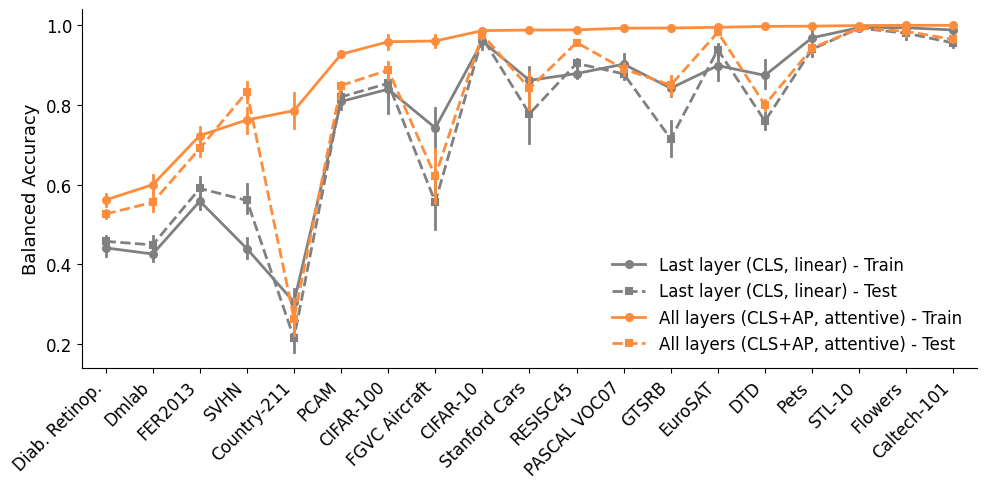

In [10]:
plt.figure(figsize=(10,5))
g = sns.pointplot(data=linear_only, x="dataset_fmt", y="train_lp_bal_acc1", 
                  order=order_datasets.index.tolist(), label="Last layer (CLS, linear) - Train", markers='o', linestyles='-', lw=2, color="grey")
g = sns.pointplot(data=linear_only, x="dataset_fmt", y="test_lp_bal_acc1", 
                  order=order_datasets.index.tolist(), ax=g, label="Last layer (CLS, linear) - Test", markers='s', linestyles='--',lw=2, color="grey")

g = sns.pointplot(data=al_alf, x="dataset_fmt", y="train_lp_bal_acc1", 
                  order=order_datasets.index.tolist(), label="All layers (CLS+AP, attentive) - Train", markers='o', linestyles='-', lw=2, color=palette_list[-3])
g = sns.pointplot(data=al_alf, x="dataset_fmt", y="test_lp_bal_acc1", 
                  order=order_datasets.index.tolist(), ax=g, label="All layers (CLS+AP, attentive) - Test",  markers='s', linestyles='--',lw=2, color=palette_list[-3])

plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right', frameon=False)
plt.xlabel("")
plt.ylabel("Balanced Accuracy")
plt.tight_layout()
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)

fn = storing_path / f'lineplot_train_test_bal_acc.pdf'
save_or_show(plt.gcf(), fn, SAVE)